<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/06_pytorch_transfer_learning_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 06. PyTorch Transfer Learning Exercises

Welcome to the 06. PyTorch Transfer Learning exercise template notebook.

There are several questions in this notebook and it's your goal to answer them by writing Python and PyTorch code.

> **Note:** There may be more than one solution to each of the exercises, don't worry too much about the *exact* right answer. Try to write some code that works first and then improve it if you can.

## Resources and solutions

* These exercises/solutions are based on [section 06. PyTorch Transfer Learning](https://www.learnpytorch.io/06_pytorch_transfer_learning/) of the Learn PyTorch for Deep Learning course by Zero to Mastery.

**Solutions:** 

Try to complete the code below *before* looking at these.

* See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/ueLolShyFqs).
* See an example [solutions notebook for these exercises on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/06_pytorch_transfer_learning_exercise_solutions.ipynb).

## 1. Make predictions on the entire test dataset and plot a confusion matrix for the results of our model compared to the truth labels. 
* **Note:** You will need to get the dataset and the trained model/retrain the model from notebook 06 to perform predictions.
* Check out [03. PyTorch Computer Vision section 10](https://www.learnpytorch.io/03_pytorch_computer_vision/#10-making-a-confusion-matrix-for-further-prediction-evaluation) for ideas.

In [1]:
#Find curr_dir
import os

# Setting up os.chdir to current path
os.chdir(os.path.abspath(os.getcwd()))

In [2]:
# Import required libraries/code
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

from torch import nn
from torchvision import transforms, datasets

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !move pytorch-deep-learning/going_modular .
    !rmdir /s /q pytorch-deep-learning


[INFO] Couldn't find going_modular scripts... downloading them from GitHub.


Cloning into 'pytorch-deep-learning'...
Updating files:  62% (154/248)
Updating files:  63% (157/248)
Updating files:  64% (159/248)
Updating files:  65% (162/248)
Updating files:  66% (164/248)
Updating files:  67% (167/248)
Updating files:  68% (169/248)
Updating files:  69% (172/248)
Updating files:  70% (174/248)
Updating files:  71% (177/248)
Updating files:  72% (179/248)
Updating files:  73% (182/248)
Updating files:  74% (184/248)
Updating files:  75% (186/248)
Updating files:  76% (189/248)
Updating files:  77% (191/248)
Updating files:  78% (194/248)
Updating files:  79% (196/248)
Updating files:  80% (199/248)
Updating files:  81% (201/248)
Updating files:  82% (204/248)
Updating files:  83% (206/248)
Updating files:  84% (209/248)
Updating files:  85% (211/248)
Updating files:  86% (214/248)
Updating files:  87% (216/248)
Updating files:  88% (219/248)
Updating files:  89% (221/248)
Updating files:  90% (224/248)
Updating files:  91% (226/248)
Updating files:  92% (229/248)

        1 dir(s) moved.


pytorch-deep-learning\data - The directory is not empty.
pytorch-deep-learning\demos - The directory is not empty.


In [3]:
from going_modular.going_modular import data_setup, engine

In [4]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### Get data 

In [5]:
import os
import requests
import zipfile

from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

    # Remove .zip file
    os.remove(data_path / "pizza_steak_sushi.zip")

# Setup Dirs
train_dir = image_path / "train"
test_dir = image_path / "test"

data\pizza_steak_sushi directory exists.


### Prepare data

In [19]:
# Create a transforms pipeline
simple_transform = transforms.Compose([
    transforms.Resize((224, 224)), # 1. Reshape all images to 224x224 (though some models may require different sizes)
    transforms.ToTensor(), # 2. Turn image values to between 0 & 1 
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                         std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),
])

In [20]:
# Create training and testing DataLoader's as well as get a list of class names
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                               test_dir=test_dir,
                                                                               transform=simple_transform, # resize, convert images to between 0 & 1 and normalize them
                                                                               batch_size=32) # set mini-batch size to 32

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x21ed81acec0>,
 ['pizza', 'steak', 'sushi'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.2489083].


Batch of train features shape: torch.Size([32, 3, 224, 224])
Batch of train labels shape: torch.Size([32])


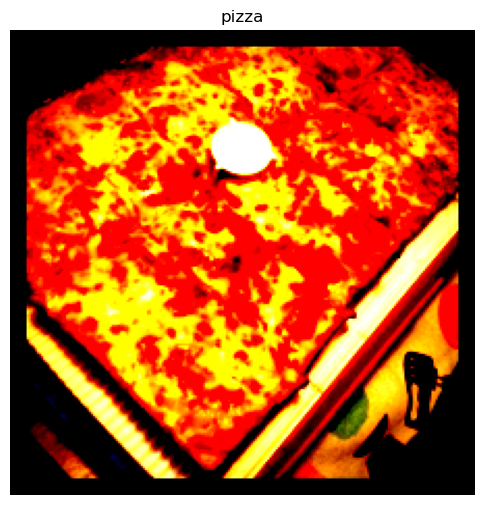

In [21]:
# Let's check one iteration of our training dataloader
train_features, train_labels = next(iter(train_dataloader))
train_features.shape, train_labels.shape

print(f"Batch of train features shape: {train_features.shape}") # shape of image data (features
print(f"Batch of train labels shape: {train_labels.shape}")     # shape of labels data

#Let's select a random index and plot the image
import random
rand_idx = random.randint(0, len(train_features)-1)
fig, ax = plt.subplots(figsize = (6, 8))

# Permute the image from (C, H, W) to (H, W, C)
ax.imshow(train_features[rand_idx].permute(1, 2, 0))
ax.set_title(class_names[train_labels[rand_idx]])
ax.axis(False)
plt.show()


### Get and prepare a pretrained model

In [22]:
# Setup the model with pretrained weights and send it to the target device 
model_0_weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
model_0 = torchvision.models.efficientnet_b0(weights=model_0_weights).to(device)
#model_0 # uncomment to output (it's very long)

In [23]:
# Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
for param in model_0.features.parameters():
    param.requires_grad = False

In [24]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
model_0.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True), 
    torch.nn.Linear(in_features=1280, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)
model_0.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=3, bias=True)
)

### Train model

In [25]:
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)

In [ ]:
# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Setup training and save the results
model_0_results = engine.train(model=model_0,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=5,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

In [27]:
print(model_0_results)

{'train_loss': [1.1033124774694443, 0.9391874745488167, 0.7610961496829987, 0.7602059096097946, 0.6309092044830322], 'train_acc': [0.37890625, 0.64453125, 0.89453125, 0.69921875, 0.88671875], 'test_loss': [0.8905929724375407, 0.8078705271085104, 0.6431093414624532, 0.5839808781941732, 0.6012211839358012], 'test_acc': [0.5700757575757576, 0.7026515151515151, 0.9071969696969697, 0.8967803030303031, 0.9071969696969697]}


### Make predictions on the entire test dataset with the model

In [28]:
from tqdm import tqdm

#Set the model.eval()
model_0.eval()

# Get them ready to iterate
y_test_true_total = []
y_test_preds_total = []

#This came in handy in the next excercise
y_test_probs_total = []
X_test_sample_total = []

# Start with torch inference mode
with torch.inference_mode():
    #Iterate across all X, y for test_dataloader
    for batch, (X, y) in tqdm(enumerate(test_dataloader), desc="Iterating across test batches...", total=len(test_dataloader)):
        X: torch.Tensor
        y: torch.Tensor

        X, y = X.to(device), y.to(device)

        #Store X samples for later use
        X_test_sample_total.extend(X.to(device))

        # Obtain y_logits from it
        y_logits = model_0(X).to(device)

        #Obtain y_probs and extend them
        y_probs = torch.softmax(y_logits, dim=1)
        
        #Obtain y_preds
        y_preds = y_probs.argmax(dim = 1)

        #Extend them respectively
        y_test_true_total.extend(y.tolist())
        y_test_preds_total.extend(y_preds.tolist())

        #Extend the test probability for the specific predicted label found
        y_test_probs_total.extend(y_probs.max(dim=1).values.tolist())

Iterating across test batches...: 100%|██████████| 3/3 [00:10<00:00,  3.45s/it]


In [29]:
print(y_test_true_total)
print(y_test_preds_total)
print(y_test_probs_total)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2]
[0.7770635485649109, 0.675362765789032, 0.6891483068466187, 0.8038529753684998, 0.4468826651573181, 0.5648267269134521, 0.6921775937080383, 0.6745672821998596, 0.743859589099884, 0.8028641939163208, 0.5015848278999329, 0.43411558866500854, 0.42036673426628113, 0.36692002415657043, 0.581071138381958, 0.4912772476673126, 0.7985925674438477, 0.5272367596626282, 0.7089882493019104, 0.8309019207954407, 0.5287259817123413, 0.584057092666626, 0.6432609558105469, 0.6304864883422852, 0.4519811272621155, 0.8022810220718384, 0.5652288794517517, 0.424435

In [30]:
#Select random sample from X_test_sample_total
random_idx = random.randint(0, len(X_test_sample_total)-1)
X_sample = X_test_sample_total[random_idx]
y_true = y_test_true_total[random_idx]
y_pred = y_test_preds_total[random_idx]
y_prob = y_test_probs_total[random_idx]

print(f"X_sample shape: {X_sample.shape}")
print(f"True class: {class_names[y_true]}, Predicted class: {class_names[y_pred]}, Probability: {y_prob:.3f}")

X_sample shape: torch.Size([3, 224, 224])
True class: pizza, Predicted class: pizza, Probability: 0.744


### Make a confusion matrix with the test preds and the truth labels

Need the following libraries to make a confusion matrix:
* torchmetrics - https://torchmetrics.readthedocs.io/en/stable/
* mlxtend - http://rasbt.github.io/mlxtend/

In [60]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.4


In [61]:
# Import mlxtend upgraded version
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.4


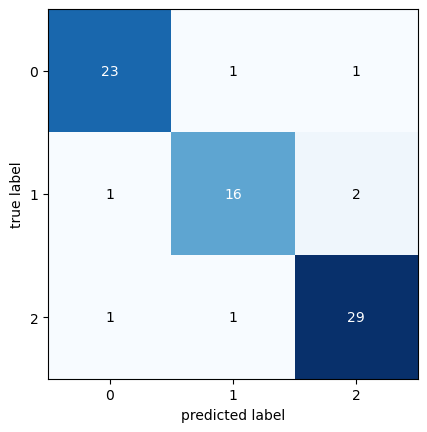

In [63]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Obtain the confusion matrix
cm = confusion_matrix(y_target=y_test_true_total,
                      y_predicted=y_test_preds_total,
                      binary=False)
fig, ax = plot_confusion_matrix(cm)
plt.show()

## 2. Get the "most wrong" of the predictions on the test dataset and plot the 5 "most wrong" images. You can do this by:
* Predicting across all of the test dataset, storing the labels and predicted probabilities.
* Sort the predictions by *wrong prediction* and then *descending predicted probabilities*, this will give you the wrong predictions with the *highest* prediction probabilities, in other words, the "most wrong".
* Plot the top 5 "most wrong" images, why do you think the model got these wrong?

You'll want to:
* Create a DataFrame with sample, label, prediction, pred prob
* Sort DataFrame by correct (does label == prediction)
* Sort DataFrame by pred prob (descending)
* Plot the top 5 "most wrong" image predictions

In [ ]:
import pandas as pd

# Create a DataFrame from the results
data = {
    "sample": [x for x in range(len(y_test_true_total))],
    "y_true": y_test_true_total,
    "y_pred": y_test_preds_total,
    "y_prob": y_test_probs_total
}

df_results = pd.DataFrame(data, index=data["sample"])

#Select subset of results where y_true != y_pred
df_incorrect = df_results[df_results["y_true"] != df_results["y_pred"]]

# Sort by probability of the predicted class (y_prob) descending
df_incorrect_sorted = df_incorrect.sort_values(by="y_prob", ascending=False)
df_incorrect_sorted.head(10)

,sample,y_true,y_pred,y_prob
70,70,2,1,0.504829
27,27,1,2,0.424436
12,12,0,1,0.420367
51,51,2,0,0.390239
29,29,1,2,0.388568
13,13,0,2,0.366920
38,38,1,0,0.364794


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.054133326..1.0658667].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.054133326..1.0747555].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.054133326..0.9843137].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.054133326..1.0792].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.04968887..1.0703111].


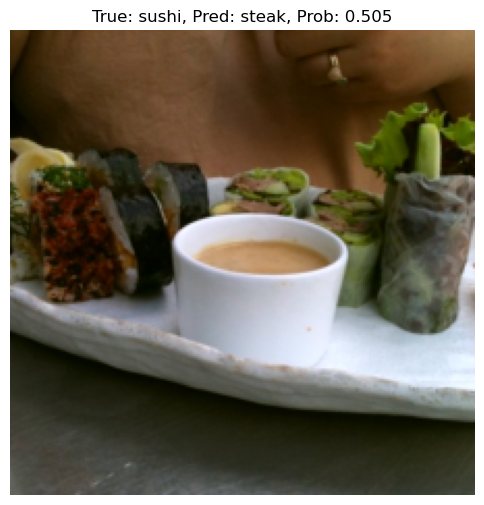

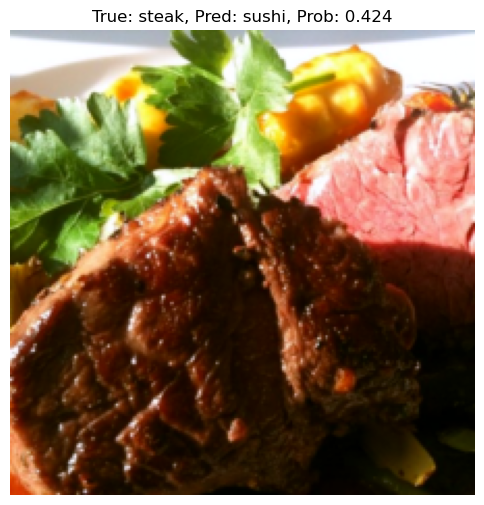

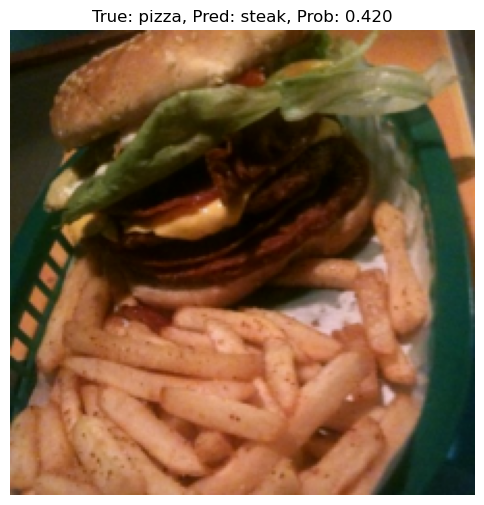

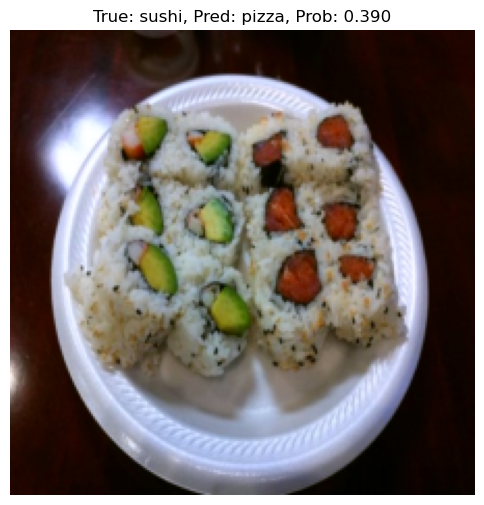

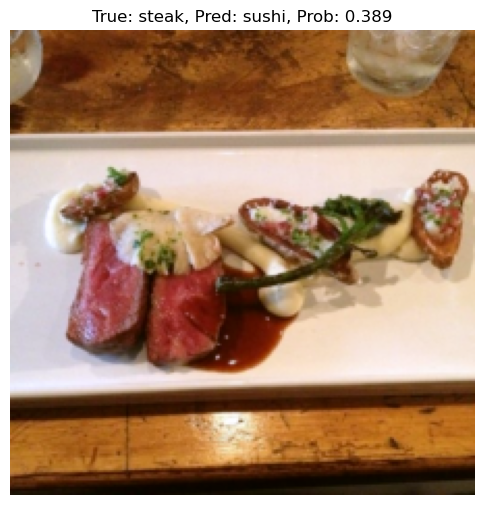

In [40]:
# Now let's plot the top 5 incorrect predictions
num_to_plot = 5

# Inverse transform to undo the transformations applied to the images
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.255],
    std=[1/0.229, 1/0.224, 1/0.255]
)

for i in range(num_to_plot):

    # Let's get the sample index
    sample_idx = df_incorrect_sorted.index[i]

    # Let's retrieve the sample data
    X_sample = X_test_sample_total[sample_idx]

    #Inverse normalize the image
    X_sample = inv_normalize(X_sample)

    #Let's get the true label, predicted label and predicted probability
    y_true = y_test_true_total[sample_idx]
    y_pred = y_test_preds_total[sample_idx]
    y_prob = y_test_probs_total[sample_idx]

    # Plot the incorrect sample
    fig, ax = plt.subplots(figsize=(6, 8))
    ax.imshow(X_sample.permute(1, 2, 0).cpu())
    ax.set_title(f"True: {class_names[y_true]}, Pred: {class_names[y_pred]}, Prob: {y_prob:.3f}")
    ax.axis(False)
plt.show()

## 3. Predict on your own image of pizza/steak/sushi - how does the model go? What happens if you predict on an image that isn't pizza/steak/sushi?
* Here you can get an image from a website like http://www.unsplash.com to try it out or you can upload your own.

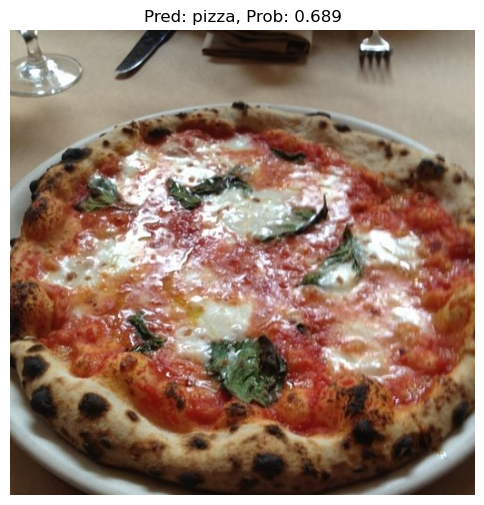

In [53]:
# TODO: Get an image of pizza/steak/sushi

#Let's select a random image from image_path
import random

#Let's get all image file paths
image_file_paths = list(image_path.rglob("*/*.jpg"))

#Select a random image file path
random_image_path = random.choice(image_file_paths)
random_image_path

# Now let's load and preprocess the image
from PIL import Image

# Load the Image
img = Image.open(random_image_path).convert("RGB")

# Preprocess the image
img_trans = simple_transform(img).unsqueeze(0).to(device) # add batch dimension and send to device

# Set model to eval and use inference mode
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(img_trans)
    y_probs = torch.softmax(y_logits, dim=1)
    y_pred = y_probs.argmax(dim=1)
    y_prob = y_probs.max().item()

# Plot the image with prediction
fig, ax = plt.subplots(figsize=(6, 8))
ax.imshow(img)
ax.set_title(f"Pred: {class_names[y_pred]}, Prob: {y_prob:.3f}")
ax.axis(False)
plt.show()


Image written to data\pizza_steak_sushi\bandeja_paisa.jpg


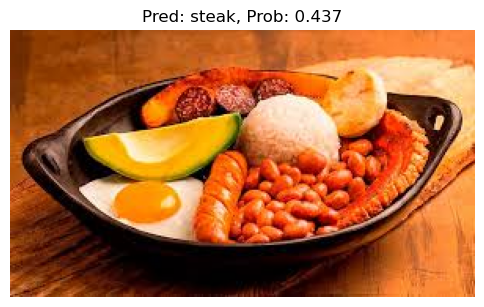

In [58]:
# TODO: Get an image of not pizza/steak/sushi

img_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT0i1O3NJNlEr6EWkU-RSXAU-7cBFhzNdDMdw&s" # Image of bandeja paisa

# Let's load the image from the URL using requests
from PIL import Image
import requests

# Let;s write the image to data folder with name bandeja_paisa.jpg
with open(image_path / "bandeja_paisa.jpg", "wb") as f:
    request = requests.get(img_url)
    f.write(request.content)
print(f"Image written to {image_path / 'bandeja_paisa.jpg'}")

# Load the Image
img = Image.open(image_path / "bandeja_paisa.jpg")
img = img.convert("RGB")

# Preprocess the image
img_trans = simple_transform(img).unsqueeze(0).to(device) # add batch dimension and send to device

# Set the model to eval and inference mode
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(img_trans)
    y_probs = torch.softmax(y_logits, dim=1)
    y_pred = y_probs.argmax(dim=1)
    y_prob = y_probs.max().item()

# Plot the image with prediction
fig, ax = plt.subplots(figsize=(6, 8))
ax.imshow(img)
ax.set_title(f"Pred: {class_names[y_pred]}, Prob: {y_prob:.3f}")
ax.axis(False)
plt.show()


## 4. Train the model from section 4  in notebook 06 part 3 for longer (10 epochs should do), what happens to the performance?

* See the model in notebook 06 part 3 for reference: https://www.learnpytorch.io/06_pytorch_transfer_learning/#3-getting-a-pretrained-model

In [ ]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
model_0 = torchvision.models.efficientnet_b0(weights=weights).to(device)

In [59]:
# TODO: Recreate a new model 
# Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
for param in model_0.features.parameters():
    param.requires_grad = False

# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Let's set up the classifier layer again
output_shape = len(class_names)
model_0.classifier = nn.Sequential(
    nn.Dropout(p=0.2, inplace=True), 
    nn.Linear(in_features=1280, 
              out_features=output_shape, # same number of output units as our number of classes
              bias=True)
)
model_0.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=3, bias=True)
)

In [ ]:
# TODO: Train the model for 10 epochs
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)

# Let's train the model for 10 epochs
epochs = 10
model_0_results_10_epochs = engine.train(model=model_0,
                               train_dataloader=train_dataloader,
                               test_dataloader=test_dataloader,
                               optimizer=optimizer,
                               loss_fn=loss_fn,
                               epochs=epochs,
                               device=device)
model_0_results_10_epochs

## 5. Train the model from section 4 above with more data, say 20% of the images from Food101 of Pizza, Steak and Sushi images.
* You can find the [20% Pizza, Steak, Sushi dataset](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip) on the course GitHub. It was created with the notebook [`extras/04_custom_data_creation.ipynb`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb). 


### Get 20% data

In [61]:
import os
import requests
import zipfile

from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"
image_data_zip_path = "pizza_steak_sushi_20_percent.zip"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / image_data_zip_path, "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / image_data_zip_path, "r") as zip_ref:
        print("Unzipping pizza, steak, sushi 20% data...") 
        zip_ref.extractall(image_path)

    # Remove .zip file
    os.remove(data_path / image_data_zip_path)

# Setup Dirs
train_dir_20_percent = image_path / "train"
test_dir_20_percent = image_path / "test"

train_dir_20_percent, test_dir_20_percent

Did not find data\pizza_steak_sushi_20_percent directory, creating one...
Unzipping pizza, steak, sushi 20% data...


(WindowsPath('data/pizza_steak_sushi_20_percent/train'),
 WindowsPath('data/pizza_steak_sushi_20_percent/test'))

### Create DataLoaders

In [62]:
# Create a transforms pipeline
simple_transform = transforms.Compose([
    transforms.Resize((224, 224)), # 1. Reshape all images to 224x224 (though some models may require different sizes)
    transforms.ToTensor(), # 2. Turn image values to between 0 & 1 
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                         std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),
])

In [63]:
# Create training and testing DataLoader's as well as get a list of class names
train_dataloader_20_percent, test_dataloader_20_percent, class_names = data_setup.create_dataloaders(train_dir=train_dir_20_percent,
                                                                                                     test_dir=test_dir_20_percent,
                                                                                                     transform=simple_transform, # resize, convert images to between 0 & 1 and normalize them
                                                                                                     batch_size=32) # set mini-batch size to 32

train_dataloader_20_percent, test_dataloader_20_percent, class_names

(<torch.utils.data.dataloader.DataLoader at 0x21ee61a8170>,
 ['pizza', 'steak', 'sushi'])

### Get a pretrained model

In [64]:
# TODO
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
model_0 = torchvision.models.efficientnet_b0(weights=weights).to(device)

# Model 0 Classifier setup
output_shape = len(class_names)
model_0.classifier = nn.Sequential(
    nn.Dropout(p=0.2, inplace=True), 
    nn.Linear(in_features=1280,
                out_features=output_shape, # same number of output units as our number of classes
                bias=True)
)

### Train a model with 20% of the data

In [65]:
# TODO
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)

# Let's train the model for 10 epochs
epochs = 10
model_0_results_20_percent = engine.train(
    model=model_0,
    train_dataloader=train_dataloader_20_percent,
    test_dataloader=test_dataloader_20_percent,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=epochs,
    device=device)
model_0_results_20_percent

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.4925 | train_acc: 0.8021 | test_loss: 0.1143 | test_acc: 0.9631
Epoch: 2 | train_loss: 0.3100 | train_acc: 0.9187 | test_loss: 0.2357 | test_acc: 0.9187
Epoch: 3 | train_loss: 0.1128 | train_acc: 0.9625 | test_loss: 0.3249 | test_acc: 0.8705
Epoch: 4 | train_loss: 0.1166 | train_acc: 0.9625 | test_loss: 0.1836 | test_acc: 0.9568
Epoch: 5 | train_loss: 0.0761 | train_acc: 0.9750 | test_loss: 0.1266 | test_acc: 0.9472
Epoch: 6 | train_loss: 0.1197 | train_acc: 0.9688 | test_loss: 0.0683 | test_acc: 0.9750
Epoch: 7 | train_loss: 0.1956 | train_acc: 0.9313 | test_loss: 0.1548 | test_acc: 0.9290
Epoch: 8 | train_loss: 0.1301 | train_acc: 0.9437 | test_loss: 0.2018 | test_acc: 0.9443
Epoch: 9 | train_loss: 0.1918 | train_acc: 0.9563 | test_loss: 0.1315 | test_acc: 0.9347
Epoch: 10 | train_loss: 0.0520 | train_acc: 0.9896 | test_loss: 0.0945 | test_acc: 0.9750


{'train_loss': [0.4925074423352877,
  0.3100020259618759,
  0.1128412801772356,
  0.11660674897332986,
  0.07610812298953533,
  0.11974320393055678,
  0.19559869517882664,
  0.13007451941569645,
  0.19176171937336525,
  0.05199839795629183],
 'train_acc': [0.8020833333333334,
  0.91875,
  0.9625,
  0.9625,
  0.975,
  0.96875,
  0.93125,
  0.94375,
  0.95625,
  0.9895833333333334],
 'test_loss': [0.11428187848068774,
  0.2357142610606388,
  0.3248798564076424,
  0.18355117081664502,
  0.12657060101628304,
  0.06827121824026108,
  0.15484698675572872,
  0.2017993301153183,
  0.13148887380957602,
  0.09446778316050768],
 'test_acc': [0.9630681818181819,
  0.91875,
  0.8704545454545455,
  0.9568181818181818,
  0.947159090909091,
  0.975,
  0.9289772727272727,
  0.9443181818181818,
  0.934659090909091,
  0.975]}

## 6. Try a different model from [`torchvision.models`](https://pytorch.org/vision/stable/models.html) on the Pizza, Steak, Sushi data, how does this model perform?
* You'll have to change the size of the classifier layer to suit our problem.
* You may want to try an EfficientNet with a higher number than our B0, perhaps `torchvision.models.efficientnet_b2()`?
  * **Note:** Depending on the model you use you will have to prepare/transform the data in a certain way.

In [ ]:
# TODO 
weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
model_2 = torchvision.models.efficientnet_b2(weights=weights).to(device)

# Model 0 Classifier setup
model_2.classifier